In [1]:
#Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Inputting data 

df=pd.read_csv("Desktop/Student_report.txt",header=None)
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

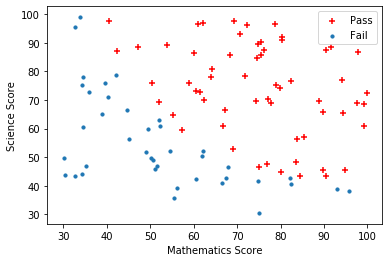

In [3]:
#Plotting the data we input

pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.xlabel("Mathematics Score")
plt.ylabel("Science Score")
plt.legend(["Pass","Fail"],loc=0)

In [4]:
#Implementing the Sigmoid Funtion

def sigmoid(z):    
    return 1/ (1 + np.exp(-z))

In [5]:
#Computing Cost and gradient

def costFunction(theta, X, y): 
    m=len(y)
    predictions = sigmoid(np.dot(X,theta))
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = 1/m * sum(error)
    grad = 1/m * np.dot(X.transpose(),(predictions - y))    
    return cost[0] , grad

In [6]:
#Implementing Feature Scaling

def featureNormalization(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    X_norm = (X - mean)/std    
    return X_norm , mean , std

In [7]:
#Calculating Initial Theta and its gradient

m , n = X.shape[0], X.shape[1]
X, X_mean, X_std = featureNormalization(X)
X= np.append(np.ones((m,1)),X,axis=1)
y=y.reshape(m,1)
initial_theta = np.zeros((n+1,1))
cost, grad= costFunction(initial_theta,X,y)
print("Cost of initial theta is",cost)
print("Gradient at initial theta (zeros):",grad)


Cost of initial theta is 0.693147180559946
Gradient at initial theta (zeros): [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


In [8]:
#Implementing Gradient Descent

def gradientDescent(X,y,theta,alpha,num_iters):
    m=len(y)
    J_history =[]
    for i in range(num_iters):
        cost, grad = costFunction(theta,X,y)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    return theta , J_history

In [9]:
theta , J_history = gradientDescent(X,y,initial_theta,1,600)

In [10]:
print("Theta optimized by gradient descent:",theta)
print("The cost of the optimized theta:",J_history[-1])

Theta optimized by gradient descent: [[1.70052917]
 [3.95453869]
 [3.68812518]]
The cost of the optimized theta: 0.203507018294296


Text(0.5, 1.0, 'Cost function using Gradient Descent')

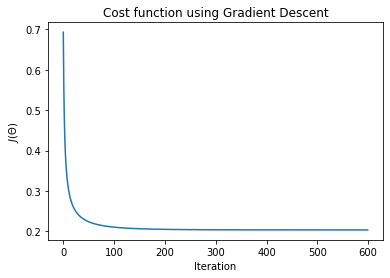

In [11]:
#Plotting the cost function

plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

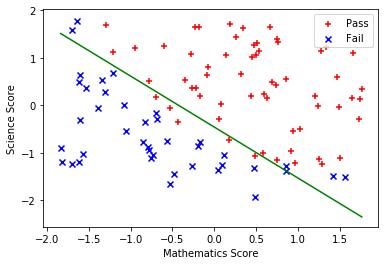

In [12]:
#Plotting the decision boundary

plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Pass")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Fail")
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]
plt.plot(x_value,y_value, "g")
plt.xlabel("Mathematics Score")
plt.ylabel("Science Score")
plt.legend(loc=0)

In [13]:
#Predicting the class

def classifierPredict(theta,X):
    predictions = X.dot(theta)    
    return predictions>0

In [14]:
#Printing the accuracy of training

p=classifierPredict(theta,X)
print("Train Accuracy:", sum(p==y)[0],"%")

Train Accuracy: 89 %
